# Logistic regression - Titanic dataset

## Loading data

In [1]:
# Importing libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data.
df = pd.read_csv('titanic-passengers.csv', sep=';', encoding="ISO-8859-1")

# Showing head - first five records.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
# Showning infos about features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [3]:
# Showing some statistics about numerical features.
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Locate missing values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  Cleaning data

In [5]:
# Preprocess missing values.
clean_df = df.copy()
clean_df = clean_df.dropna(subset=['Embarked'])
clean_df['Age'].fillna(clean_df['Age'].mean(), inplace=True) 
clean_df['Cabin'].fillna('G6', inplace=True)

In [6]:
# Feature transformation for categoricals features.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
clean_df['Survived'] = encoder.fit_transform(clean_df['Survived'])
clean_df['Sex'] = encoder.fit_transform(clean_df['Sex'])
clean_df['Embarked'] = encoder.fit_transform(clean_df['Embarked'])
clean_df['Cabin'] = encoder.fit_transform(clean_df['Cabin'])

In [7]:
# Creating a new feature 'Title'. 

Title_Dictionary = {
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Dr":"Officer",
    "Rev":"Officer",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "Lady":"Royalty",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Miss",
    "Mlle":"Miss",
    "Miss":"Miss",
    "Ms":"Mrs",
    "Mr":"Mrs",
    "Mrs":"Mrs",
    "Master":"Master",
    }
updated_df = clean_df.copy()
Title = []
for index, row in updated_df.iterrows():
    for k in Title_Dictionary:
        if k+"." in row['Name']:
            Title.append(Title_Dictionary[k])

updated_df['Title'] = Title 
updated_df['Title'] = encoder.fit_transform(updated_df['Title'])
processed_df = updated_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
processed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,2,1,28.0,0,0,13.0000,144,2,2
1,0,3,1,25.0,0,0,7.6500,139,2,2
2,0,3,1,20.0,0,0,7.8542,144,2,2
3,0,3,0,29.0,0,4,21.0750,144,2,2
4,0,1,1,31.0,1,0,52.0000,37,2,2


## Applying logistic regression

In [8]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']

X = processed_df[feature_cols] # Features
y = processed_df.Survived # Target variable

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
# import the class
from sklearn.linear_model import LogisticRegression

lgstc_reg = LogisticRegression()
lgstc_reg.fit(X_train,y_train)
y_pred=lgstc_reg.predict(X_test)

## Confusion Matrix

In [11]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[137,  21],
       [ 37,  72]], dtype=int64)

## Confusion Matrix Interpretation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

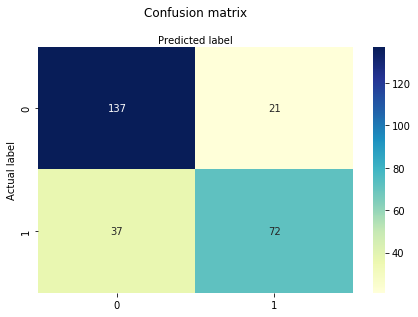

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Informations

In [14]:
#evaluation metric
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.782771535581
Precision: 0.774193548387
Recall: 0.660550458716


## Receiver Operating Characteristic ou ROC

La courbe ROC croise le taux de vrais positifs (un autre nom pour le rappel) avec le taux de faux positifs. Le taux de faux positifs (False Positive Rate ou FP) est le pour centage d’observations négatives qui sont incorrectement classées comme positives. Il est égal à 1 moins le taux de vrais négatifs, qui est le pourcentage d’observations négatives qui sont correctement classées comme négatives. Le taux de faux négatifs (True Negative Rate ou TN) est aussi appelé spécificité. Par conséquent la courbe ROC croise sensibilité et 1 – spécificité.
Une façon de comparer les classificateurs consiste à mesurer l’aire sous la courbe (Area Under the Curve ou AUC). Un classificateur parfait aurait une aire sous la courbe ROC (ou ROC AUC) égale à 1, tandis qu’un classificateur purement aléa toire aurait une ROC AUC de 0,5.

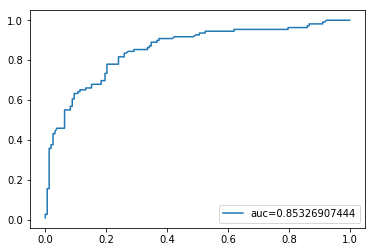

In [15]:
y_pred_proba = lgstc_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()